#**ML Lab Assignment - 8 (SVM Multi class classification)**

##**Arya Chakraborty** - **22MSD7020**

## Importing required libraries and loading 'Loan Application' dataset from Kaggle

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,mean_squared_error,mean_absolute_error, roc_curve, auc


In [3]:
data =pd.read_csv('Loan_data.csv')

In [4]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


## Data Preprocessing

In [5]:
# Drop unnecessary features

data.drop(['Loan_ID', 'Gender','Unnamed: 0'], axis=1, inplace=True)

In [6]:
# checking for null values

data.isnull().count()

Married              500
Dependents           500
Education            500
Self_Employed        500
ApplicantIncome      500
CoapplicantIncome    500
LoanAmount           500
Loan_Amount_Term     500
Credit_History       500
Property_Area        500
Loan_Status          500
Total_Income         500
dtype: int64

In [7]:
# dropping null values

df = data.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 1 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            398 non-null    object 
 1   Dependents         398 non-null    object 
 2   Education          398 non-null    object 
 3   Self_Employed      398 non-null    object 
 4   ApplicantIncome    398 non-null    int64  
 5   CoapplicantIncome  398 non-null    float64
 6   LoanAmount         398 non-null    float64
 7   Loan_Amount_Term   398 non-null    float64
 8   Credit_History     398 non-null    float64
 9   Property_Area      398 non-null    object 
 10  Loan_Status        398 non-null    object 
 11  Total_Income       398 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 40.4+ KB


### Since the dataset being used does not have risk category (low-risk, medium-risk, or high-risk borrower), I am creating it by taking into consideration attributes such as 'loan_status' and 'income'.

In [11]:
# Categorize the borrowers into high, medium, and low-risk
def risk_catagory(row):
    if row['Loan_Status'] == 'Y':
        if row['Credit_History'] == 0:
            return 'high-risk'
        else:
            if row['ApplicantIncome'] > 5000:
                return 'low-risk'
            else:
                return 'medium-risk'
    else:
        return 'high-risk'

df['risk_category'] = df.apply(risk_catagory, axis=1)

C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\3726966835.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risk_category'] = df.apply(risk_catagory, axis=1)


C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\1184034841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risk_category'] = df.apply(risk_catagory, axis=1)


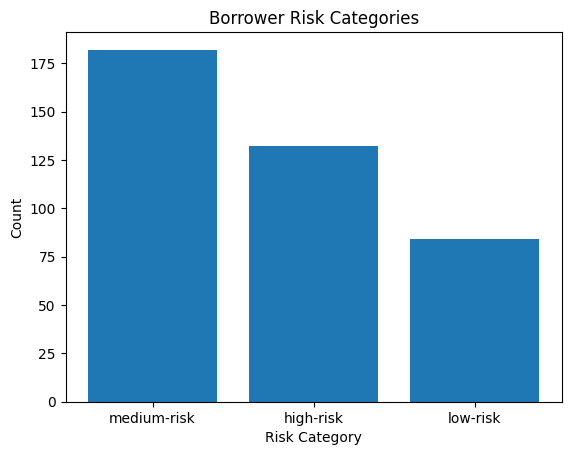

In [12]:
# Create a new column with the risk categories
df['risk_category'] = df.apply(risk_catagory, axis=1)

# Plot the categories
categories = df['risk_category'].value_counts()
plt.bar(categories.index, categories.values)
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.title('Borrower Risk Categories')
plt.show()

In [13]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,risk_category
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0,high-risk
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0,medium-risk
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0,medium-risk
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0,low-risk
5,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,$9613.0,low-risk


In [14]:
# Replace the categorical values with numeric values
df['Married'] = df['Married'].replace({'No': 0, 'Yes': 1})
df['Education'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})
df['Self_Employed'] = df['Self_Employed'].replace({'No': 0, 'Yes': 1})
df['Property_Area'] = df['Property_Area'].replace({'Rural': 0,'Semiurban':1, 'Urban': 2})
df['Loan_Status'] = df['Loan_Status'].replace({'N': 0, 'Y': 1})


C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\3089896050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married'] = df['Married'].replace({'No': 0, 'Yes': 1})
C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\3089896050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})
C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\3089896050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [16]:
# encoding to numeric

label_encoder = LabelEncoder()
df['risk_category'] = label_encoder.fit_transform(df['risk_category'])

C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\1427944643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risk_category'] = label_encoder.fit_transform(df['risk_category'])


In [17]:
#removing non-numeric characters from income

df['Total_Income'] = pd.to_numeric(df['Total_Income'].str.replace('$', ''))

C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\3168310681.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total_Income'] = pd.to_numeric(df['Total_Income'].str.replace('$', ''))
C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\3168310681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Income'] = pd.to_numeric(df['Total_Income'].str.replace('$', ''))


In [18]:
# Remove non-numeric characters from dependent attribute 
df['Dependents'] = df['Dependents'].str.replace('+', '')

# Convert col1 column to float type
df['Dependents'] = df['Dependents'].astype(float)


C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\91495691.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace('+', '')
C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\91495691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dependents'] = df['Dependents'].str.replace('+', '')
C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\91495691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerical variables to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Total_Income']] = scaler.fit_transform(df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Total_Income']])

C:\Users\chakr\AppData\Local\Temp\ipykernel_13392\2315699904.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Total_Income']] = scaler.fit_transform(df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Total_Income']])


In [20]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,risk_category
1,1,1.0,1,0,0.054830,0.0754,0.162518,0.72973,1.0,0,0,0.058435,0
2,1,0.0,1,1,0.035250,0.0000,0.071742,0.72973,1.0,2,1,0.019583,2
3,1,0.0,0,0,0.030093,0.1179,0.150805,0.72973,1.0,2,1,0.043980,2
4,0,0.0,1,0,0.072356,0.0000,0.181552,0.72973,1.0,2,1,0.057292,1
5,1,2.0,1,1,0.065145,0.2098,0.366032,0.72973,1.0,2,1,0.102705,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 1 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            398 non-null    int64  
 1   Dependents         398 non-null    float64
 2   Education          398 non-null    int64  
 3   Self_Employed      398 non-null    int64  
 4   ApplicantIncome    398 non-null    float64
 5   CoapplicantIncome  398 non-null    float64
 6   LoanAmount         398 non-null    float64
 7   Loan_Amount_Term   398 non-null    float64
 8   Credit_History     398 non-null    float64
 9   Property_Area      398 non-null    int64  
 10  Loan_Status        398 non-null    int64  
 11  Total_Income       398 non-null    float64
 12  risk_category      398 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 43.5 KB


## Implementing SVM Model & HyperParameter Tuning

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('risk_category', axis=1), df['risk_category'],test_size=0.3, random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,0.2,0.3,0.4,0.5,1,5,10,15,20], 'kernel': ['linear', 'Polynomial kernel',"Sigmoid kernel","Gaussian kernel"], 'gamma': ['scale', 'auto']}

In [24]:
svm1 = SVC()
grid_search = GridSearchCV(svm1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [25]:
grid_search.fit(X_train, y_train)

c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", l

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10, 15, 20],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'Polynomial kernel',
                                    'Sigmoid kernel', 'Gaussian kernel']},
             scoring='accuracy')

In [26]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 15, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.9351948051948051


In [27]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9083333333333333


In [28]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('RMSE :', rmse)
print('MAE :', mae)

RMSE : 0.30276503540974914
MAE : 0.09166666666666666


In [29]:
# Evaluate the performance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Accuracy: 0.91, Precision: 0.91, Recall: 0.91, F1-score: 0.90


In [ ]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

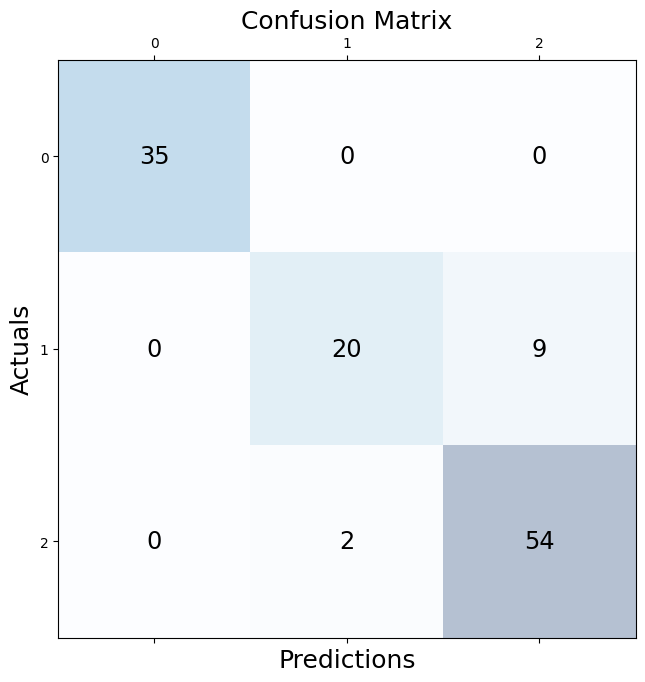

In [33]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()